# Activity 3.1 Decision Tree

Objective(s):

This activity aims to perform classification using Decision Tree

Intended Learning Outcomes (ILOs):
* Demonstrate how to build the model using Decision Tree.
* Demonstrate how to evaluate the performance of the model.
* Demonstrate how to create tree visualization of the model.

Resources:
* Jupyter Notebook
* kyphosis 

Procedure:

Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data and check the content of the dataframe using Pandas

In [26]:
df = pd.read_csv(r'C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 312\Logistic Regression, Decision Tree , Random Forest\data\Decision Tree\kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


Check the pairplot of the data

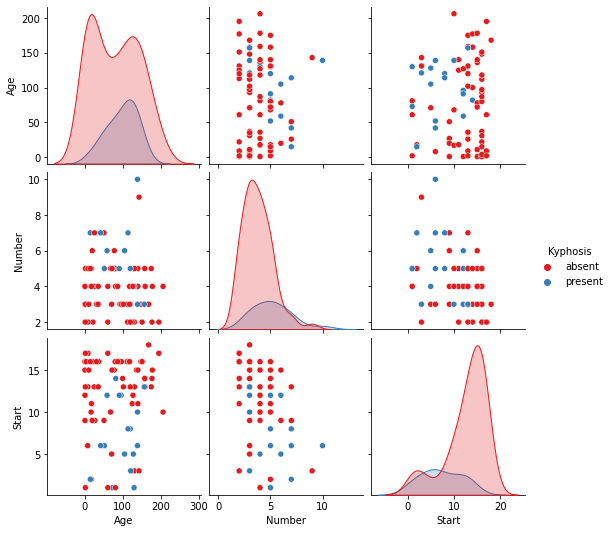

In [27]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

FRom the beginning, it seems that the number of absent class is greater than the number of present class. Based on the correlations for both classes, there doesn't seem to be any correlation between the feature variables, as evidenced by the points moving vertically upwards instead of at an incline. Most of the ages that have kyphosis are 120 - 140 years old. Most of the ones that don't have it also fall within the same range as well as in the range of below 40 years old.

Build the model using Decision Tree

Split the data into training and test set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train a single decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Determine how many nodes are present and what the depth of this (very large) tree is.

The number of nodes and the maximum actual depth.

In [33]:
dtree.tree_.node_count, dtree.tree_.max_depth

(29, 6)

Predict and evaluate the model

In [34]:
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [36]:
#evaluate the performance using classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25



Interpret the precision, recall and f1-score

The precision is higher for the absent class which makes sense since this class has a higher count that for the present class. Looking at the class absent and its precision and recall score. I'd focus more on the precision since it takes into consideration False Positives, or predicted value of 'absent' when the actual value is 'present'. This is because it is argubaly better to be falsely diagnosed to have the disease than to be falsely diagnosed to not have the disease. Conversely, the recall of the class present is most important since it takes into consideration the amount of false negative diagnosis. The low metrica may also be caused by the imabalanced dataset, so we are not sure if the model would perform at predicting present cases given a larget dataset containing the present class. As such and given the limited data we have, the metrics score indicate that this is a terrible model to use.

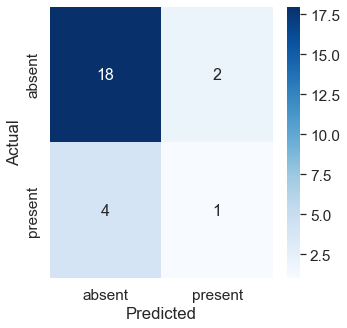

In [43]:
data = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(predictions), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

Interpret the performance using classification matrix

Terrible at predicting present class, but not so bad in predicting absent class. However, the false negtative value of 4 is a cause for concern. 

In [50]:
#evaluate the performance using accuracy scores of baseline models

print(y_test.shape)
y_majority = np.full(25, "absent")
y_random = np.random.choice(["present", "absent"], size=25)

print("model accuracy score {}".format(accuracy_score(y_test, predictions)))
print("random model accuracy score {}".format(accuracy_score(y_test, y_random)))
print("majority model accuracy score {}".format(accuracy_score(y_test, y_majority)))

model accuracy score 0.76
random model accuracy score 0.4
majority model accuracy score 0.8


Interpret the performance of the model using accuracy score

We can benchmark our model agains baseline models wherein the predicted values are either random (y_random) or contains the majority target class (y_majority). Checking their accuracies and comparing our model's own accuracy against these dumb models can give as a pretty good idea whether our model is worthwhile and better. Unfortunately, accuracy from a model that predicts the majority target class outperformed our trained model's accuracy. This means that our trained model is not a very good one and will likley underperform in the real-world scenerio.

Create a tree visualization of the model

In [51]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [67]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
filename = 'kyphosis.png'
img = Image(filename=filename)
display(img)

# Supplementary Activity:
* Choose your own dataset 
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization 
* Build the model using Decision Tree
* Evaluate the model using classification report, accuracy and confusion matrix
* Create a tree visualization of the model

# Decision Tree Model

## Splitting the dataset

In [68]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 312\Logistic Regression, Decision Tree , Random Forest\data\Logistic Regression\weatherAUS.csv")

In [69]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [72]:
df.dropna(subset = ["RainTomorrow"],inplace=True)

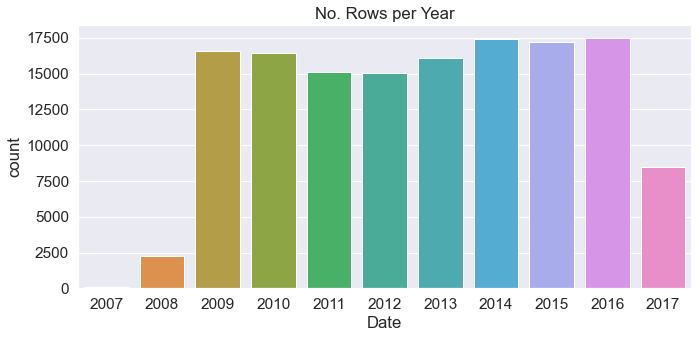

In [79]:
plt.figure(figsize=(10,5))
plt.title('No. Rows per Year')
sns.countplot(x=pd.to_datetime(df["Date"]).dt.year)
plt.tight_layout();

In [94]:
year = pd.to_datetime(df["Date"]).dt.year
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [95]:
print("shape of train_df is {}".format(train_df.shape))
print("shape of validity_df is {}".format(val_df.shape))
print("shape of test_df is {}".format(test_df.shape))

shape of train_df is (98988, 23)
shape of validity_df is (17231, 23)
shape of test_df is (25974, 23)


In [96]:
train_inputs = train_df.drop(['Date', 'RainTomorrow'], axis =1)
train_target = train_df["RainTomorrow"]

In [97]:
val_inputs = val_df.drop(['Date', 'RainTomorrow'], axis =1)
val_target = val_df["RainTomorrow"]
test_inputs = test_df.drop(['Date', 'RainTomorrow'], axis =1)
test_target = test_df["RainTomorrow"]

    collect all the columns that are numerical and categorical and put them into a list


In [98]:
num_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_inputs.select_dtypes(include=["object"]).columns.tolist()

In [99]:
train_inputs[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98554.000000,98790.00000,97988.000000,61878.00000,58292.000000,92086.000000,97855.000000,97848.000000,97723.000000,97802.000000,89643.000000,89679.000000,63224.000000,62222.000000,98205.000000,98325.000000
mean,12.002014,23.00288,2.372935,5.28686,7.602136,40.230969,14.102192,18.770430,68.651822,51.501728,1017.518046,1015.138523,4.308048,4.414451,16.827340,21.525622
std,6.345487,6.99008,8.518819,3.95104,3.788266,13.713042,8.994121,8.877497,18.995535,20.742760,7.073083,6.997504,2.867317,2.694295,6.399855,6.832509
min,-8.500000,-4.10000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.80000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.40000,0.000000,4.60000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.500000,20.900000
75%,16.600000,27.90000,0.800000,7.20000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.300000,26.100000
max,33.900000,48.10000,371.000000,82.40000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [100]:
train_inputs[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing missing data


In [101]:
from sklearn.impute import SimpleImputer

#create an imputer object
imputer = SimpleImputer(strategy="mean")

In [102]:
# check the columns that have nan values and how many
train_inputs[num_cols].isnull().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

In [103]:
# fit the imputer model to fill each column with missing values the mean value for that column
imputer.fit(train_inputs[num_cols])

SimpleImputer()

In [104]:
# the object imputer now contains an atribute called .statistics_ which contains the mean value for each column. We can access this:
list(imputer.statistics_)

[12.002014124236458,
 23.002879846138278,
 2.37293546148508,
 5.286859627007984,
 7.602135799080491,
 40.2309688769194,
 14.102192018803331,
 18.770429645981523,
 68.6518219866357,
 51.50172798102288,
 1017.5180460270183,
 1015.1385228648849,
 4.308047576869543,
 4.414451480183858,
 16.82733974848531,
 21.525622171370454]

In [105]:
# we need to inject these values in the predictor variable for all our datasets.

train_inputs[num_cols] = imputer.fit_transform(train_inputs[num_cols])
val_inputs[num_cols] = imputer.fit_transform(val_inputs[num_cols])
test_inputs[num_cols] = imputer.fit_transform(test_inputs[num_cols])

## Normalizing our Numerical columns


In [106]:
from sklearn.preprocessing import MinMaxScaler

#create an object for MinMaxScaler
scaler = MinMaxScaler()

#scaler.transform({data fram with num cols}) will result in the scaling of the values from (0,1)

train_inputs[num_cols] = scaler.fit_transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.fit_transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.fit_transform(test_inputs[num_cols])

In [107]:
# verify that the scaling worked (val_inputs is used to see the max and min but train_inputs and test_inputs both have a max of 1 and min of 0)
val_inputs[num_cols].describe().loc[["min","max"]]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Encoding Categorical Data


In [108]:
# check all of our categorical columns
train_inputs[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [109]:
train_inputs[cat_cols].isnull().sum()

Location          0
WindGustDir    6943
WindDir9am     7323
WindDir3pm     2030
RainToday      1000
dtype: int64

In [110]:
from sklearn.preprocessing import OneHotEncoder

In [111]:
# encoder object
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

### Try to impute missing categorical values by inputting "Unknown"


In [112]:
test_inputs.fillna("Unknown", inplace = True)
train_inputs.fillna("Unknown", inplace = True)
val_inputs.fillna("Unknown", inplace = True)

In [113]:
#check to see if imputation works (val_df2 is shown here but test_df2 and train_df2 also are modified)
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,0.516509,0.517241,0.001617,0.064161,0.531618,W,0.294574,W,WNW,...,0.275862,0.71,0.22,0.449587,0.463696,0.888889,0.490495,0.494577,0.525391,No
1,Albury,0.375000,0.559387,0.000000,0.064161,0.531618,WNW,0.294574,NNW,WSW,...,0.252874,0.44,0.25,0.497521,0.475248,0.478672,0.490495,0.501085,0.574219,No
2,Albury,0.504717,0.570881,0.000000,0.064161,0.531618,WSW,0.310078,W,WSW,...,0.298851,0.38,0.30,0.447934,0.490099,0.478672,0.222222,0.583514,0.552734,No
3,Albury,0.417453,0.614943,0.000000,0.064161,0.531618,NE,0.139535,SE,E,...,0.103448,0.45,0.16,0.613223,0.557756,0.478672,0.490495,0.520607,0.617188,No
4,Albury,0.613208,0.697318,0.002695,0.064161,0.531618,W,0.271318,ENE,NW,...,0.229885,0.82,0.33,0.500826,0.445545,0.777778,0.888889,0.514100,0.679688,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.714559,0.000000,0.064161,0.531618,SSE,0.286822,ESE,SSE,...,0.298851,0.22,0.13,0.555372,0.508251,0.478672,0.490495,0.642082,0.720703,No
144549,Uluru,0.556604,0.783525,0.000000,0.064161,0.531618,NE,0.193798,ENE,SW,...,0.229885,0.16,0.08,0.530579,0.471947,0.478672,0.490495,0.754881,0.779297,No
144550,Uluru,0.608491,0.802682,0.000000,0.064161,0.531618,ESE,0.255814,ESE,SSE,...,0.103448,0.15,0.08,0.519008,0.478548,0.478672,0.490495,0.772234,0.796875,No
144551,Uluru,0.674528,0.816092,0.000000,0.064161,0.531618,ESE,0.286822,ESE,SSW,...,0.195402,0.22,0.09,0.553719,0.498350,0.478672,0.490495,0.774403,0.826172,No


In [114]:
# We must first fit our encoder object with our dataframe so it can recognize the categorical columns
encoder.fit(train_inputs[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [115]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [116]:
# generate columns names to label our new one-hot encoded columns
encoded_cols = list(encoder.get_feature_names(cat_cols))

print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [117]:
# Now that we have generated the one-hot encoded columns, we shall append them to our train, validation, and test datasets
train_inputs[encoded_cols] = encoder.fit_transform(train_df[cat_cols])
test_inputs[encoded_cols] = encoder.fit_transform(test_df[cat_cols])
val_inputs[encoded_cols] = encoder.fit_transform(val_df[cat_cols])

In [118]:
# Delete redundant columns such as the categori columns such as the ones we used the one-encoded on
train_inputs.drop(cat_cols, axis = 1, inplace = True)
test_inputs.drop(cat_cols, axis = 1, inplace = True)
val_inputs.drop(cat_cols, axis = 1, inplace = True)

In [119]:
#same outputs for the train and validation datasets.
test_inputs.columns.tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',

In [120]:
print("train_inputs shape is {}".format(train_inputs.shape))
print("train_target shape is {}".format(train_target.shape))
print("val_inputs shape is {}".format(val_inputs.shape))
print("val_target shape is {}".format(val_target.shape))
print("test_inputs shape is {}".format(test_inputs.shape))
print("test_target shape is {}".format(test_target.shape))

train_inputs shape is (98988, 119)
train_target shape is (98988,)
val_inputs shape is (17231, 119)
val_target shape is (17231,)
test_inputs shape is (25974, 119)
test_target shape is (25974,)


In [121]:
from sklearn.tree import DecisionTreeClassifier

decisiontree_model = DecisionTreeClassifier()
decisiontree_model.fit(train_inputs, train_target)


DecisionTreeClassifier()

## Classification Metrics prior to hypertuning

In [160]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [129]:
y_predictions_decisiontree = decisiontree_model.predict(val_inputs)

In [130]:
val_target.value_counts()

No     13583
Yes     3648
Name: RainTomorrow, dtype: int64

In [131]:
#evaluate the performance using accuracy scores of baseline models

print(val_target.shape)
y_majority = np.full(val_target.shape[0], "No")
y_random = np.random.choice(["No", "Yes"], val_target.shape[0])

print("model accuracy score {}".format(accuracy_score(val_target, y_predictions_decisiontree)))
print("random model accuracy score {}".format(accuracy_score(val_target, y_random)))
print("majority model accuracy score {}".format(accuracy_score(val_target, y_majority)))

(17231,)
model accuracy score 0.7738378503859323
random model accuracy score 0.4947478381985956
majority model accuracy score 0.7882885497069235


We can benchmark our model agains baseline models wherein the predicted values are either random (y_random) or contains the majority target class (y_majority). Checking their accuracies and comparing our model's own accuracy against these dumb models can give as a pretty good idea whether our model is worthwhile and better. Unfortunately, accuracy from a model that predicts the majority target class outperformed our trained model's accuracy. This means that our trained model is not a very good one and will likley underperform in the real-world scenerio.

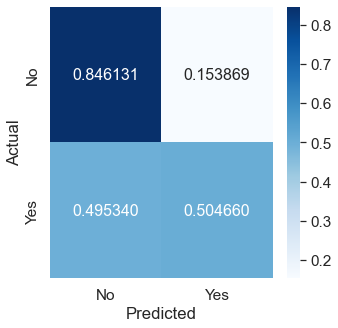

In [182]:
data = confusion_matrix(val_target, y_predictions_decisiontree, normalize = "true")
df_cm = pd.DataFrame(data, columns=np.unique(y_predictions_decisiontree), index = np.unique(val_target))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", fmt= 'f',annot=True,annot_kws={"size": 16});

When it comes to predicting the chances of raining, the model is very unreliable. The number of False Negative to the number of True Positive is almost the same. This means the amount of times the model predicted it was going to rain and got it right is in the same frequency when the model predicted it will not rain despite the fact that it had rained. The model is really struggling to correctly predict positive (Yes) values. 

In [150]:
print(classification_report(val_target, y_predictions_decisiontree))

              precision    recall  f1-score   support

          No       0.86      0.85      0.86     13583
         Yes       0.47      0.50      0.49      3648

    accuracy                           0.77     17231
   macro avg       0.67      0.68      0.67     17231
weighted avg       0.78      0.77      0.78     17231



In [156]:
decisiontree_model.predict_proba(val_inputs).shape

(17231, 2)

In [157]:
val_target.shape

(17231,)

In [165]:
roc_auc_score(val_target, decisiontree_model.predict_proba(val_inputs)[:,1])

0.6753956405614088

Using predict_proba method


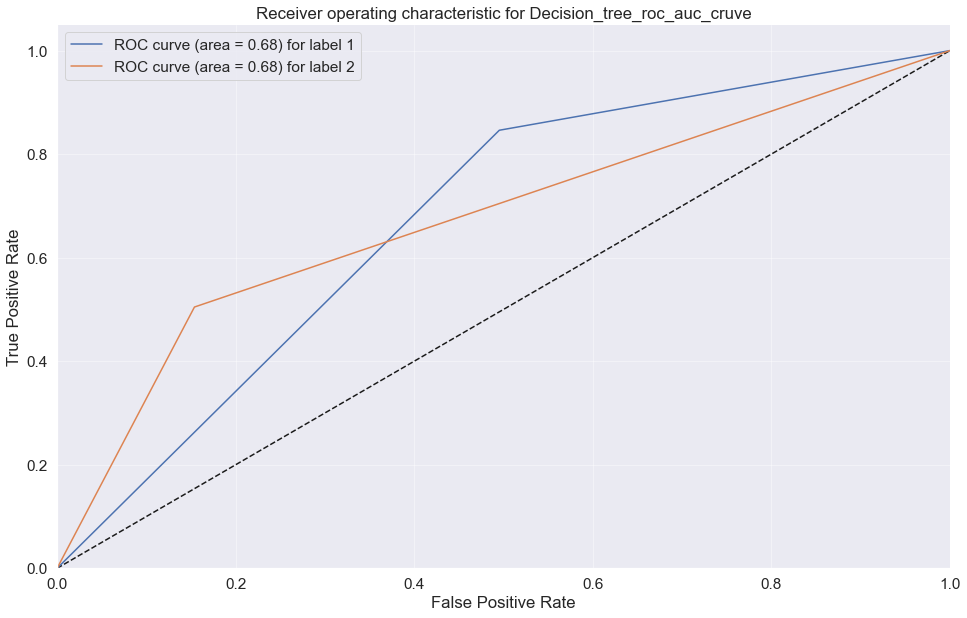

In [167]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    try: 
        y_score = clf.decision_function(X_test)
        print("Using decision_function method")
    except: 
        y_score = clf.predict_proba(X_test)
        print("Using predict_proba method")
        
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Decision_tree_roc_auc_cruve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show();

plot_multiclass_roc(decisiontree_model, val_inputs, val_target, n_classes=2, figsize=(16, 10))

Very bad ROC curve and AUC score. Ideally the line should hug the upper left corner of the graph to maintain a True Positive Rate of 1.0 as much as possible.

In [172]:
decisiontree_model.tree_.node_count, decisiontree_model.tree_.max_depth

(22231, 48)

## Tuning the Decision Tree Model

In [168]:
decisiontree_random_grid = {
                          'max_depth': [4,7,10,15],
                          'min_samples_leaf': [1, 2, 4],
                          'criterion':['gini', 'entropy'],
                          }

In [170]:
from sklearn.model_selection import GridSearchCV

clf_decisiontree = GridSearchCV(decisiontree_model, decisiontree_random_grid, cv=5, verbose=True, n_jobs=-1)

In [171]:
best_clf_decisiontree = clf_decisiontree.fit(val_inputs, val_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


## Classification Metrics on Optimized Decision Tree Model

In [175]:
best_clf_decisiontree.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}

In [176]:
decisiontree_model_optimized = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4,
 min_samples_leaf= 1)
decisiontree_model_optimized.fit(val_inputs, val_target)
y_predictions_decisiontree_optimized = decisiontree_model_optimized.predict(val_inputs)

In [177]:
decisiontree_model_optimized.tree_.node_count, decisiontree_model_optimized.tree_.max_depth

(31, 4)

In [178]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

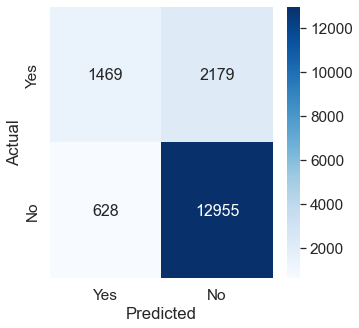

In [194]:
data = confusion_matrix(val_target, y_predictions_decisiontree_optimized, labels = ["Yes", "No"],)
df_cm = pd.DataFrame(data, columns=["Yes", "No"], index = ["Yes", "No"])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", fmt='d',annot=True,annot_kws={"size": 16});

The optimized model got better at getting True Negatives but got worse in prediciting True Positives.

In [195]:
print("previous classification report")
print(classification_report(val_target, y_predictions_decisiontree))

previous classification report
              precision    recall  f1-score   support

          No       0.86      0.85      0.86     13583
         Yes       0.47      0.50      0.49      3648

    accuracy                           0.77     17231
   macro avg       0.67      0.68      0.67     17231
weighted avg       0.78      0.77      0.78     17231



In [196]:
print("Newwer classification report")
print(classification_report(val_target, y_predictions_decisiontree_optimized))

Newwer classification report
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     13583
         Yes       0.70      0.40      0.51      3648

    accuracy                           0.84     17231
   macro avg       0.78      0.68      0.71     17231
weighted avg       0.82      0.84      0.82     17231



Our precision score for Yes class increased, but its recal decreased. What does this mean? If the model predicts that it will rain, it is 70% correct most of the time. For some people this doesn't seem like an ideal prediction. It's recall is low at 40% meaning it has predicted only 40% of all the days it rained.

In [197]:
print("Previous ROC_AUC score {}".format(roc_auc_score(val_target, decisiontree_model.predict_proba(val_inputs)[:,1])))
print("new ROC_AUC Score {}".format(roc_auc_score(val_target, decisiontree_model_optimized.predict_proba(val_inputs)[:,1])))

Previous ROC_AUC score 0.6753956405614088
new ROC_AUC Score 0.8218082987344861


Using predict_proba method


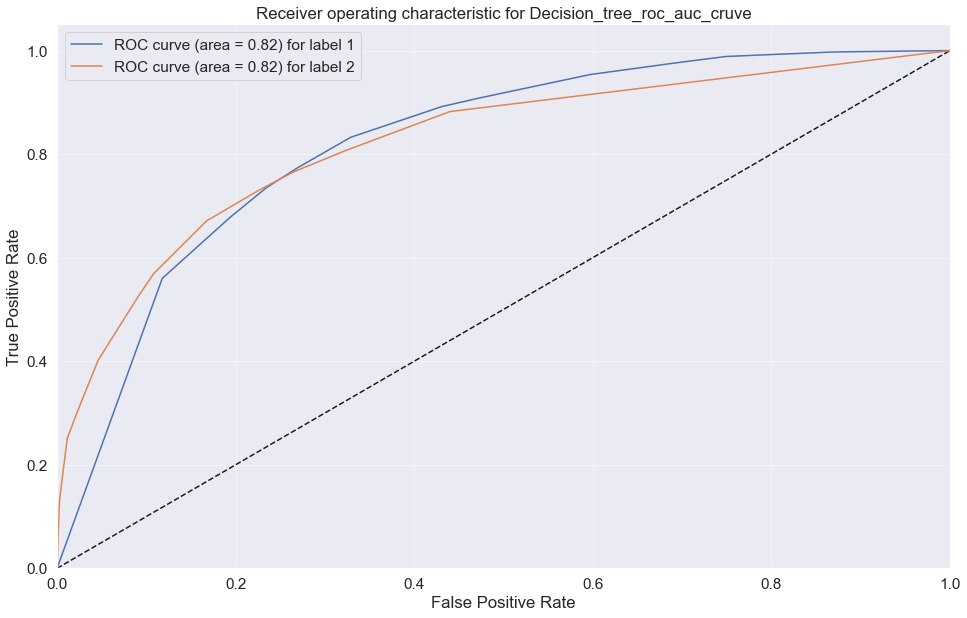

In [186]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    try: 
        y_score = clf.decision_function(X_test)
        print("Using decision_function method")
    except: 
        y_score = clf.predict_proba(X_test)
        print("Using predict_proba method")
        
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Decision_tree_roc_auc_cruve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show();

plot_multiclass_roc(decisiontree_model_optimized, val_inputs, val_target, n_classes=2, figsize=(16, 10))

The ROC curve and score got better. However, it is still not ideal. The line should hug the upper left corner of the graph to maintain a True Positive Rate of 1.0 as much as possible.

In [200]:
#evaluate the performance using accuracy scores of baseline models

print(val_target.shape)
y_majority = np.full(val_target.shape[0], "No")
y_random = np.random.choice(["No", "Yes"], size=val_target.shape[0])

print("optimized model accuracy score {}".format(accuracy_score(val_target, y_predictions_decisiontree_optimized)))
print("random model accuracy score {}".format(accuracy_score(val_target, y_random)))
print("majority model accuracy score {}".format(accuracy_score(val_target, y_majority)))

(17231,)
optimized model accuracy score 0.837095931750914
random model accuracy score 0.5009575764610296
majority model accuracy score 0.7882885497069235


We can benchmark our model agains baseline models wherein the predicted values are either random (y_random) or contains the majority target class (y_majority). Checking their accuracies and comparing our model's own accuracy against these dumb models can give as a pretty good idea whether our model is worthwhile and better. Fortunately, between the optimized model and the other baseline model, our trained model now has the biggest accuracy. Accuracy score is a general metric that might be a little more useful if we have balanced dataset since accuracy score is not very detailed and doesn't capture the specific aspects and capabilities of the model.

## Final Model Performance using our test set.

In [201]:
y_predictions_decisiontree_optimized_test = decisiontree_model_optimized.predict(test_inputs)

In [203]:
decisiontree_model_optimized.tree_.node_count, decisiontree_model_optimized.tree_.max_depth

(31, 4)

In [204]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

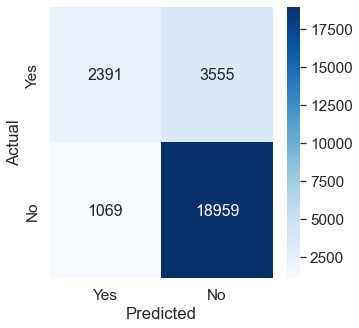

In [205]:
data = confusion_matrix(test_target, y_predictions_decisiontree_optimized_test, labels = ["Yes", "No"],)
df_cm = pd.DataFrame(data, columns=["Yes", "No"], index = ["Yes", "No"])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", fmt='d',annot=True,annot_kws={"size": 16});

In [206]:
print("Newwer classification report")
print(classification_report(test_target, y_predictions_decisiontree_optimized_test))

Newwer classification report
              precision    recall  f1-score   support

          No       0.84      0.95      0.89     20028
         Yes       0.69      0.40      0.51      5946

    accuracy                           0.82     25974
   macro avg       0.77      0.67      0.70     25974
weighted avg       0.81      0.82      0.80     25974



In [210]:
print("validation set ROC_AUC score {}".format(roc_auc_score(val_target, decisiontree_model_optimized.predict_proba(val_inputs)[:,1])))
print("test set ROC_AUC Score {}".format(roc_auc_score(test_target, decisiontree_model_optimized.predict_proba(test_inputs)[:,1])))

validation set ROC_AUC score 0.8218082987344861
test set ROC_AUC Score 0.7877752134230376


Using predict_proba method


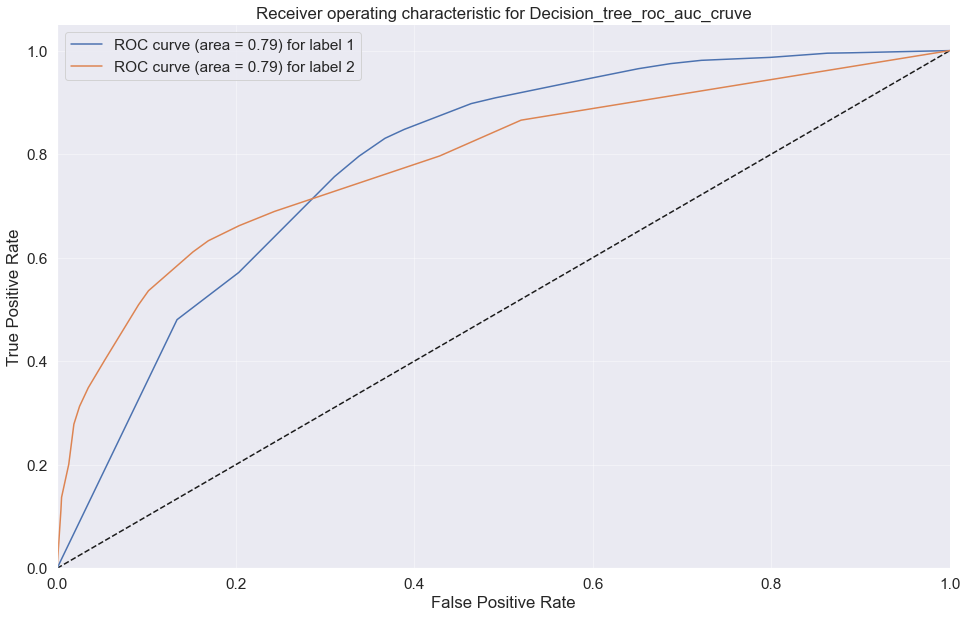

In [211]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    try: 
        y_score = clf.decision_function(X_test)
        print("Using decision_function method")
    except: 
        y_score = clf.predict_proba(X_test)
        print("Using predict_proba method")
        
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Decision_tree_roc_auc_cruve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show();

plot_multiclass_roc(decisiontree_model_optimized, test_inputs, test_target, n_classes=2, figsize=(16, 10))

The ROC curve and score got better. However, it is still not ideal. The line should hug the upper left corner of the graph to maintain a True Positive Rate of 1.0 as much as possible.

In [212]:
#evaluate the performance using accuracy scores of baseline models

print(test_target.shape)
y_majority = np.full(test_target.shape[0], "No")
y_random = np.random.choice(["No", "Yes"], size=test_target.shape[0])

print("optimized model accuracy score using test set {}".format(accuracy_score(test_target, y_predictions_decisiontree_optimized_test)))
print("random model accuracy score {}".format(accuracy_score(test_target, y_random)))
print("majority model accuracy score {}".format(accuracy_score(test_target, y_majority)))

(25974,)
optimized model accuracy score using test set 0.821975821975822
random model accuracy score 0.49742049742049743
majority model accuracy score 0.7710787710787711


# Conclusion

After hypertuning the Decision Tree model, it did underperormed when we used the test data to create metrics and compared them compared to when we used the model on the validation set instead. The model is not a very good one and will likley underperform in the real-world scenerio. It has really low recall for its Yes class (40%) which means that it was not able to correctly predict the amount of times it did rain. This is a deal breaker for a lot of weather prediction/forecast situations. I think recall as well as the precision could become greater if we have more data points.